<a href="https://colab.research.google.com/github/LamaSaad24/MWS/blob/WDA/WDA_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WDAوظيفة
  # اشراف : د.باسل الخطيب
  ## اعداد:
   ### (موسى العيسى mosa_285032)   -  (لمى  سعد lama_284671)
   ### (إباء الراس ebaa_282951)    -   (عطاء قطرنجي  ataa_308117)

# --------------------------- 1ST  ---------------------------

In [ ]:
# load the pandas package
import pandas as pd

#--------------------------- 1ST  ---------------------------

# Load Data
data = pd.read_csv("/content/sample_data/sales_data_sample.csv", encoding="latin1")


# Print a concise summary of a DataFrame.
print("data information: ")
print(data.info())

# Generate descriptive statistics.
print("descriptive statistics : ",data.describe())

# Print the sum of all null values.
print("the numbers of null fields: ",data.isnull().sum())

# Delete Column 'ADDRESSLINE2'
data = data.drop("ADDRESSLINE2", axis=1)


# Select Data Type Object
object_data = data.select_dtypes(include="object")


# Select Data Type Number
number_data = data.select_dtypes(exclude="object")

# Preprocessing For Object Data
for col in object_data:
    if object_data[col].isna().sum() > 0:
        object_data[col].fillna(value=data[col].mode()[0], inplace=True)

# Merge Data After Preprocessing
data = pd.concat([object_data, number_data], axis=1)

# sum of duplicated rows
print("duplicated data",data.duplicated())

# Print sum Of NAN After Preprocessing
print("numbers of not null values :",data.isna().sum())

data.head()

data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 n

,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,...,DEALSIZE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,2/24/2003 0:00,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,...,Small,10107,30,95.70,2,2871.00,1,2,2003,95
1,5/7/2003 0:00,Shipped,Motorcycles,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,CA,51100,...,Small,10121,34,81.35,5,2765.90,2,5,2003,95
2,7/1/2003 0:00,Shipped,Motorcycles,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,CA,75508,...,Medium,10134,41,94.74,2,3884.34,3,7,2003,95
3,8/25/2003 0:00,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,...,Medium,10145,45,83.26,6,3746.70,3,8,2003,95
4,10/10/2003 0:00,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,28034,...,Medium,10159,49,100.00,14,5205.27,4,10,2003,95


# --------------------------- 2ND  ---------------------------

In [ ]:
# --------------------------- 2ND  ---------------------------
data["TotalRevenue"] = data["PRICEEACH"] * data["QUANTITYORDERED"]
product_metrics = data.groupby(["PRODUCTCODE"]).agg(
    {
        "ORDERNUMBER": "count",  # Total number of orders
        "QUANTITYORDERED": "sum",  # Total units sold
        "PRICEEACH": "mean",  # Average price per unit
        "TotalRevenue": "sum",
    }
)


product_metrics = product_metrics.sort_values(by="TotalRevenue", ascending=False)
print("----------------- Here are product_metrics ---------------")
print(product_metrics)


----------------- Here are product_metrics ---------------
             ORDERNUMBER  QUANTITYORDERED   PRICEEACH  TotalRevenue
PRODUCTCODE                                                        
S18_3232              52             1774   99.045000     176026.63
S24_3856              27             1052   98.068519     103489.89
S18_4600              27             1031   98.374444     101835.00
S24_2300              27              996  100.000000      99600.00
S18_2238              27              966   99.555556      96300.00
...                  ...              ...         ...           ...
S24_2022              25              851   50.862400      42524.98
S24_2972              27              912   45.498519      42145.94
S32_2206              25              836   47.084000      39237.71
S24_1937              25              844   43.992000      37392.38
S24_3969              22              745   45.046818      33181.66

[109 rows x 4 columns]


In [ ]:
# Top 10 by units sold
top_selling_products = product_metrics.nlargest(10, "QUANTITYORDERED")
top_selling_products = top_selling_products["QUANTITYORDERED"]
print("Top selling products (by units sold):")
print(top_selling_products)

Top selling products (by units sold):
PRODUCTCODE
S18_3232     1774
S24_3856     1052
S18_4600     1031
S700_4002    1029
S12_4473     1024
S24_3949     1008
S18_1097      999
S50_1341      999
S18_2432      998
S18_3856      997
Name: QUANTITYORDERED, dtype: int64


In [ ]:
# Top 10 by revenue
high_revenue_products = product_metrics.nlargest(10, "TotalRevenue")
high_revenue_products = high_revenue_products["TotalRevenue"]
print("High revenue products:")
print(high_revenue_products)

High revenue products:
PRODUCTCODE
S18_3232    176026.63
S24_3856    103489.89
S18_4600    101835.00
S24_2300     99600.00
S18_2238     96300.00
S10_1949     96100.00
S18_2319     95780.80
S12_1666     95738.73
S12_4473     95489.58
S12_2823     95367.08
Name: TotalRevenue, dtype: float64


In [ ]:
# smallest  10 by units sold
smallest_selling_products = product_metrics.nsmallest(10, "QUANTITYORDERED")
smallest_selling_products = smallest_selling_products["QUANTITYORDERED"]
print("smallest selling products (by units sold):")
print(smallest_selling_products)

smallest selling products (by units sold):
PRODUCTCODE
S18_4933    714
S24_1046    724
S18_2248    743
S24_3969    745
S18_2581    746
S18_4409    750
S24_3191    779
S24_1785    784
S18_2795    789
S12_3990    800
Name: QUANTITYORDERED, dtype: int64


In [ ]:
# smallest 10 by revenue
low_revenue_products = product_metrics.nsmallest(10, "TotalRevenue")
low_revenue_products = low_revenue_products["TotalRevenue"]
print("Low revenue products:")
print(low_revenue_products)

Low revenue products:
PRODUCTCODE
S24_3969    33181.66
S24_1937    37392.38
S32_2206    39237.71
S24_2972    42145.94
S24_2022    42524.98
S24_2840    43761.98
S24_1628    45905.95
S18_2248    47776.85
S50_1341    49706.57
S18_1367    51247.03
Name: TotalRevenue, dtype: float64


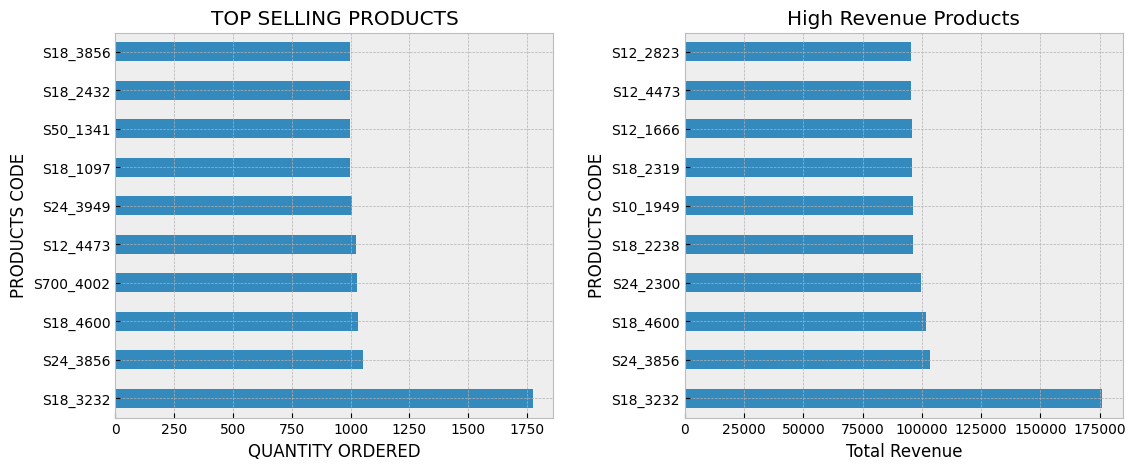

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)

top_selling_products.plot(kind="barh", figsize=(10, 5), color="#348abd")
plt.xlabel("QUANTITY ORDERED")
plt.ylabel("PRODUCTS CODE")
plt.title("TOP SELLING PRODUCTS")
plt.subplot(1, 2, 2)
high_revenue_products.plot(kind="barh", figsize=(13, 5), color="#348abd")
plt.xlabel("Total Revenue")
plt.ylabel("PRODUCTS CODE")
plt.title("High Revenue Products")
plt.show()

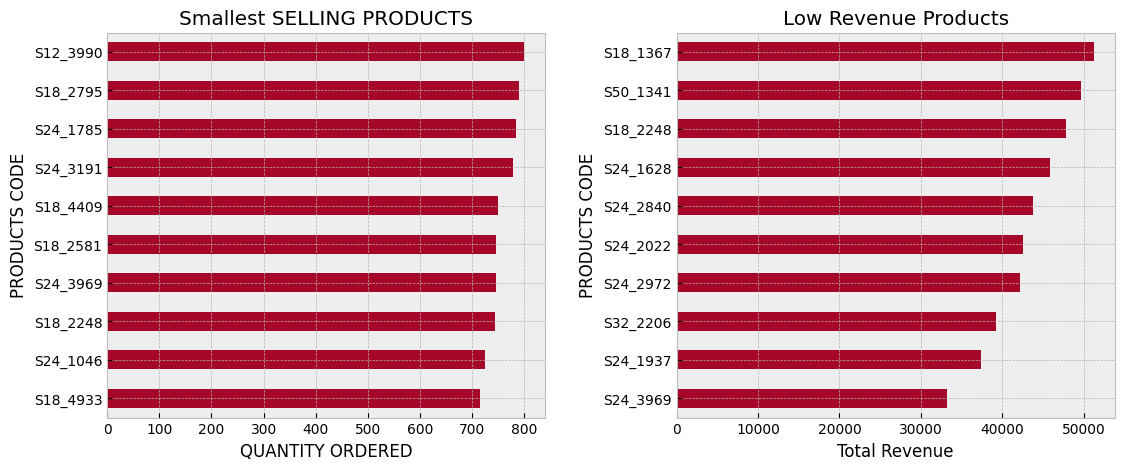

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)

smallest_selling_products.plot(kind="barh", figsize=(10, 5), color="#a60628")
plt.xlabel("QUANTITY ORDERED")
plt.ylabel("PRODUCTS CODE")
plt.title("Smallest SELLING PRODUCTS")
plt.subplot(1, 2, 2)
low_revenue_products.plot(kind="barh", figsize=(13, 5), color="#a60628")
plt.xlabel("Total Revenue")
plt.ylabel("PRODUCTS CODE")
plt.title("Low Revenue Products")
plt.show()

# --------------------------- 3RD  ---------------------------

In [ ]:
# Convert the date column to a date data type
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# order data by ORDERDATE
data_sorted = data.sort_values(by='ORDERDATE')

monthly_metrics = data.groupby(data_sorted['ORDERDATE'].dt.to_period('M')).agg(
    {
        "PRODUCTCODE": "count",
        "QUANTITYORDERED": "sum",
        "PRICEEACH": "mean",
        "TotalRevenue": "sum",
    }
)
print("Here are -------------- monthly_metrics -------------------")
print(monthly_metrics)

Here are -------------- monthly_metrics -------------------
           PRODUCTCODE  QUANTITYORDERED  PRICEEACH  TotalRevenue
ORDERDATE                                                       
2003-01             39             1357  82.136154     107885.96
2003-02             41             1449  83.940244     120036.80
2003-03             50             1755  81.733400     144096.23
2003-04             58             1993  84.915690     169421.03
2003-05             58             2017  81.951207     163654.12
2003-06             46             1649  84.333261     139552.84
2003-07             50             1725  86.208200     149869.73
2003-08             58             1974  83.211379     166026.32
2003-09             76             2510  84.306974     211045.86
2003-10            158             5515  84.601646     466240.57
2003-11            296            10179  83.506385     850203.27
2003-12             70             2489  83.929286     210117.21
2004-01             91        

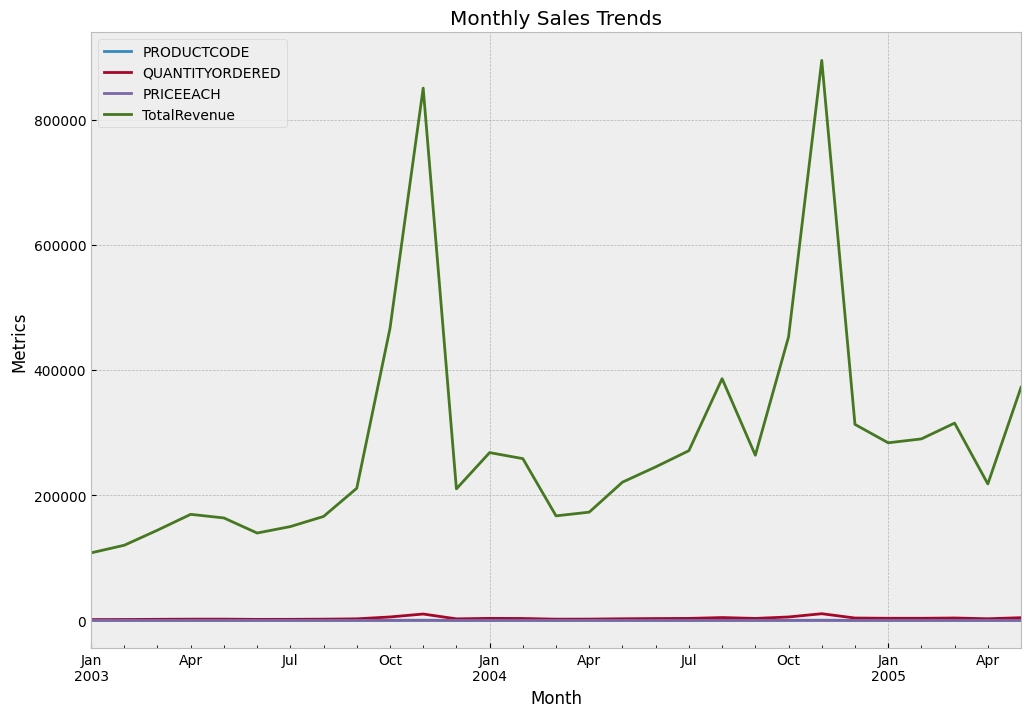

In [ ]:
monthly_metrics.plot(kind='line', figsize=(12, 8))

plt.xlabel('Month')
plt.ylabel('Metrics')
plt.title('Monthly Sales Trends')
plt.legend()


plt.show()

# --------------------------- 4TH ---------------------------

In [ ]:
top_cities = (
    data.groupby("CITY").sum().sort_values("TotalRevenue", ascending=False).head()
)
print("Recommendations for other cities:")
print("- Targeted marketing campaigns")
print("- Localized promotions and discounts")
print("- Improved customer service and support")


Recommendations for other cities:
- Targeted marketing campaigns
- Localized promotions and discounts
- Improved customer service and support


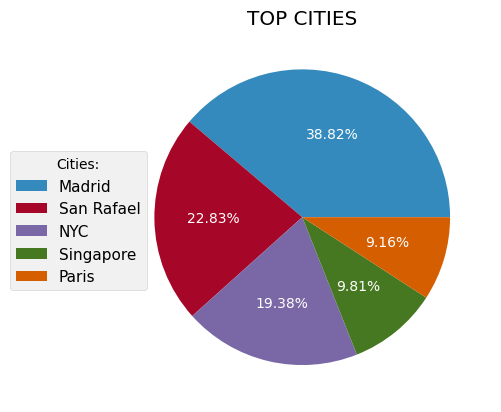

In [ ]:
plt.pie(
    top_cities["TotalRevenue"],
    labels=top_cities["TotalRevenue"].index,
    autopct="%.2f%%",
    textprops=dict(color="w"),
)
plt.title("TOP CITIES")
plt.legend(bbox_to_anchor=(0.1, 0.7), fontsize=11, title="Cities:")
plt.show()

Recommendations for other cities:
- Targeted marketing campaigns
- Localized promotions and discounts
- Improved customer service and support